## Importação de bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Análise inicial do dataframe

In [3]:
# Leitura do dataset
dataframe = pd.read_csv('Sprint3_Diabetes.csv')
# Apresentação dos primeiros 5 valores
dataframe.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
#Apresentação das principais informações do dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Tratamento dos dados 

Será realizado um tratamento de dados para assim evitarmos utilização de dados duplicados ou invalidos, 
dessa forma teremos uma análise mais precisa.

### Remoção de duplicatas

In [5]:
#Número de dados antes da remoção das duplicatas
registros_antes = dataframe.shape[0]

df = dataframe.drop_duplicates()

#Número de dados depois da remoção das duplicatas
registros_depois = df.shape[0]

#Resultado
print(f'Os dados com duplicatas eram: {registros_antes}, e sem duplicatas se tornaram: {registros_depois}. Uma diferença de: {registros_antes-registros_depois}')

Os dados com duplicatas eram: 253680, e sem duplicatas se tornaram: 229781. Uma diferença de: 23899


### Correção de tipo de dados

In [6]:
#Vizualizando os tipos de dados de cada coluna
print(df.dtypes)
df.info()

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP         

In [7]:
# Verificando os valores das colunas Sex, Education e Income
print(df['Sex'].unique())
print(df['Education'].unique())
print(df['Income'].unique())

[0. 1.]
[4. 6. 3. 5. 2. 1.]
[3. 1. 8. 6. 4. 7. 2. 5.]


In [8]:
# Convertendo as colunas Sex, Education e Income para category
df_original = df.copy()

def classificarDiabetes(valor):
    if valor == 0:
        return 'Sem Diabetes'
    elif valor ==1:
        return 'Pré Diabetes'
    return 'Diabetes'

def classficarGenHealth(valor):
    if valor == 1:
        return 'Excelente'
    elif valor == 2:
        return 'Muito boa'
    elif valor == 3:
        return 'Boa'
    elif valor == 4:
        return 'Regular'
    return 'Ruim' 

df['Diabetes_012'] = df['Diabetes_012'].apply(classificarDiabetes)
df['Diabetes_012'] = df['Diabetes_012'].astype('category')
df['GenHlth'] = df['GenHlth'].apply(classficarGenHealth)
df['GenHlth'] = df['GenHlth'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].apply(lambda x: 'Masculino' if x==1 else 'Feminino')
df['Education'] = df['Education'].astype('category')
df['Income'] = df['Income'].astype('category')

C:\Users\ruiam\AppData\Local\Temp\ipykernel_17708\2138749690.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diabetes_012'] = df['Diabetes_012'].apply(classificarDiabetes)
C:\Users\ruiam\AppData\Local\Temp\ipykernel_17708\2138749690.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diabetes_012'] = df['Diabetes_012'].astype('category')
C:\Users\ruiam\AppData\Local\Temp\ipykernel_17708\2138749690.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [9]:
# Verificando a conversão
print(df.dtypes)

Diabetes_012            category
HighBP                   float64
HighChol                 float64
CholCheck                float64
BMI                      float64
Smoker                   float64
Stroke                   float64
HeartDiseaseorAttack     float64
PhysActivity             float64
Fruits                   float64
Veggies                  float64
HvyAlcoholConsump        float64
AnyHealthcare            float64
NoDocbcCost              float64
GenHlth                 category
MentHlth                 float64
PhysHlth                 float64
DiffWalk                 float64
Sex                     category
Age                      float64
Education               category
Income                  category
dtype: object


### Remoção dos outliers

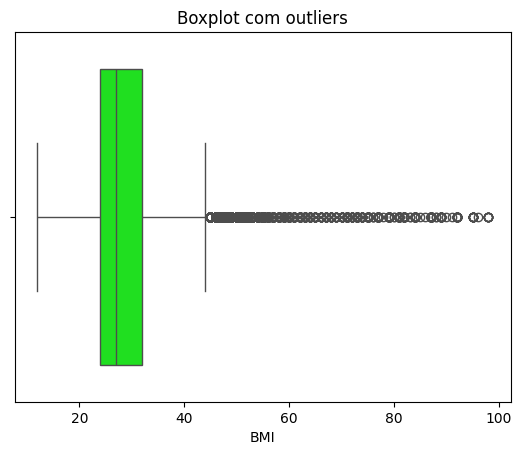

In [10]:
sns.boxplot(x=df['BMI'],color='lime')
plt.title('Boxplot com outliers')
plt.show()

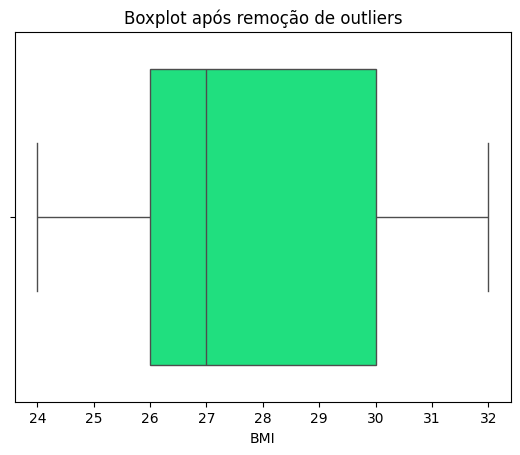

In [11]:
#Determinando limites superiores e inferiores usando intervalo interquantil (IQR) e removendo os dados fora deste limite
Q1 = df['BMI'].quantile(0.25)
Q2 = df['BMI'].quantile(0.75)
IQR = Q1 - Q2
#Adicionando um multiplicador para diminuir a agrassividade do IQR
multiplicador = 0

#Definindo limites inferior e superior
LI = Q1 - multiplicador * IQR
LS = Q2 + multiplicador * IQR


#Removendo os outliers
df_tratado = df[(df['BMI'] >= LI) & (df['BMI']<= LS)]

sns.boxplot(x=df_tratado['BMI'],color='springgreen')
plt.title('Boxplot após remoção de outliers')
plt.show()

## Estatísticas Descritivas

In [12]:
# Armazenado descrição (estatísticas descritivas) do dataframe em uma variável
descricao_df = df.describe()
# Apresentando descrição 
descricao_df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,Age
count,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,0.794813,0.060710,0.946075,0.092810,3.505373,4.675178,0.185507,8.086582
std,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,0.403839,0.238798,0.225871,0.290167,7.713725,9.046568,0.388709,3.093809
min,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,4.000000,0.000000,10.000000
max,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000


### Médias

In [13]:
print('Médias: ')
# Apresenta linha de médias
descricao_df.iloc[1]

Médias: 


HighBP                   0.454441
HighChol                 0.441760
CholCheck                0.959535
BMI                     28.685670
Smoker                   0.465661
Stroke                   0.044756
HeartDiseaseorAttack     0.103216
PhysActivity             0.733355
Fruits                   0.612966
Veggies                  0.794813
HvyAlcoholConsump        0.060710
AnyHealthcare            0.946075
NoDocbcCost              0.092810
MentHlth                 3.505373
PhysHlth                 4.675178
DiffWalk                 0.185507
Age                      8.086582
Name: mean, dtype: float64

### Medianas

In [14]:
print('Medianas: ')
# Apresenta linha de medianas
descricao_df.iloc[5]

Medianas: 


HighBP                   0.0
HighChol                 0.0
CholCheck                1.0
BMI                     27.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Age                      8.0
Name: 50%, dtype: float64

### Desvios Padrões

In [15]:
print('Desvios Padrões: ')
# Apresenta linha de desvios padrões
descricao_df.iloc[2]

Desvios Padrões: 


HighBP                  0.497921
HighChol                0.496598
CholCheck               0.197047
BMI                     6.786360
Smoker                  0.498821
Stroke                  0.206767
HeartDiseaseorAttack    0.304241
PhysActivity            0.442206
Fruits                  0.487073
Veggies                 0.403839
HvyAlcoholConsump       0.238798
AnyHealthcare           0.225871
NoDocbcCost             0.290167
MentHlth                7.713725
PhysHlth                9.046568
DiffWalk                0.388709
Age                     3.093809
Name: std, dtype: float64

### Contagem de dados revelantes 

Contagem por tipo de diabete

<Axes: xlabel='Diabetes_012', ylabel='Count'>

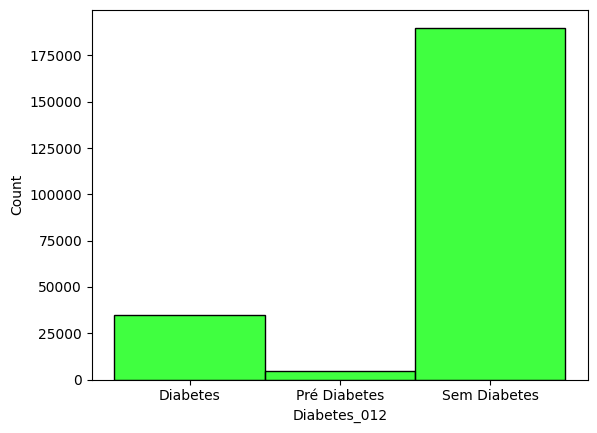

In [16]:
sns.histplot(data=df,x='Diabetes_012',color='lime')

Contagem por sexo

<Axes: xlabel='Sex', ylabel='Count'>

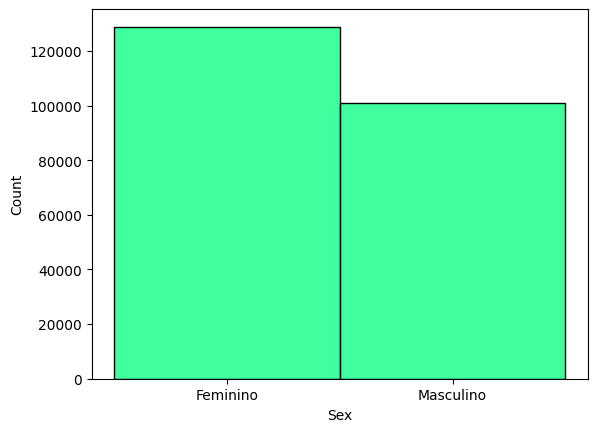

In [17]:
sns.histplot(data=df,x='Sex',color='springgreen')

Contagem por classificação geral de saúde

<Axes: xlabel='GenHlth', ylabel='Count'>

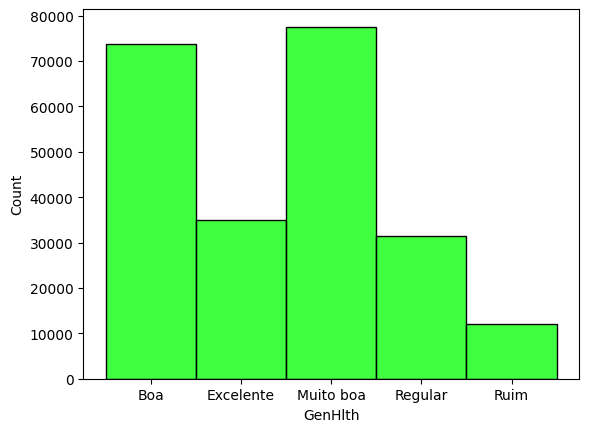

In [18]:
sns.histplot(data=df,x='GenHlth',color='lime')

## Análise Gráfica

Contagem de pressão alta por tipo de diabetes, separado por sexo.

C:\Users\ruiam\AppData\Local\Temp\ipykernel_17708\2263845688.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:springgreen'` for the same effect.

  sns.catplot(data=df,x='Diabetes_012',y='HighBP',kind='bar',hue='Sex',color='springgreen')


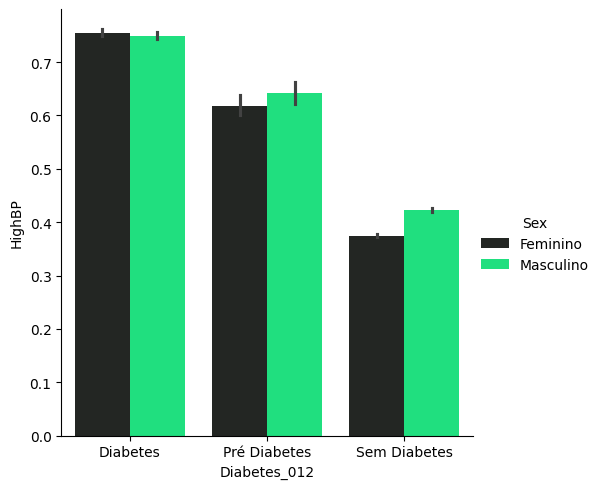

In [19]:
sns.catplot(data=df,x='Diabetes_012',y='HighBP',kind='bar',hue='Sex',color='springgreen')

Distribuição de qualidade geral de saúde por tipo de diabetes. 

<Axes: xlabel='Diabetes_012', ylabel='GenHlth'>

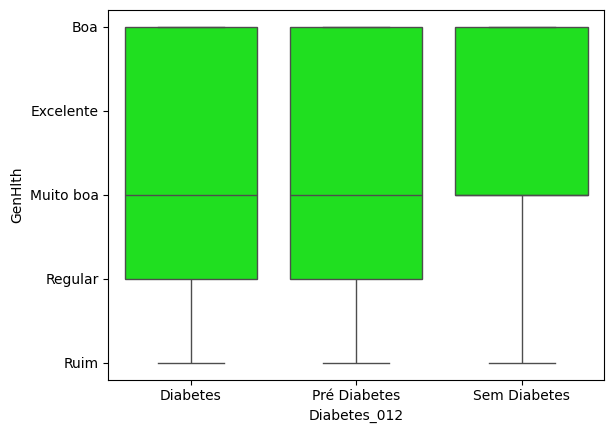

In [20]:
sns.boxplot(data=df,x='Diabetes_012',y='GenHlth',color='lime')

Contagem de escala de renda por tipo de diabetes, separada por sexo.

C:\Users\ruiam\AppData\Local\Temp\ipykernel_17708\756946148.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:springgreen'` for the same effect.

  g = sns.catplot(data=df,x='Diabetes_012',y='Income',kind='bar',hue='Sex',color='springgreen')


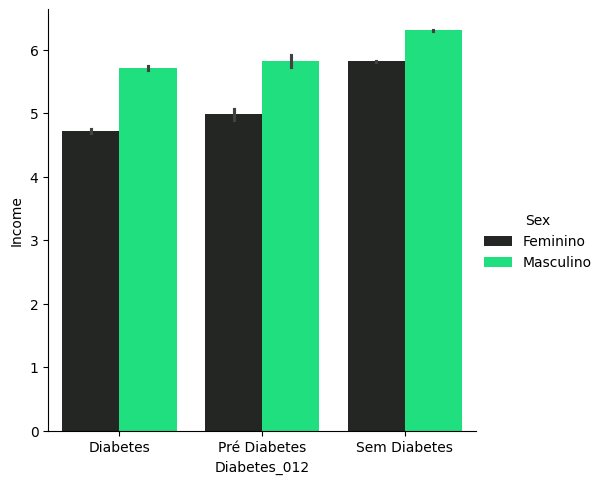

In [21]:
g = sns.catplot(data=df,x='Diabetes_012',y='Income',kind='bar',hue='Sex',color='springgreen')
g.ax.invert_yaxis()

Contagem de pressão alta por tipo de diabetes, separado por colesterol alto.

C:\Users\ruiam\AppData\Local\Temp\ipykernel_17708\2685304981.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lime'` for the same effect.

  sns.barplot(data=df,x='Diabetes_012',y='HighBP',hue='HighChol',color='lime')


<Axes: xlabel='Diabetes_012', ylabel='HighBP'>

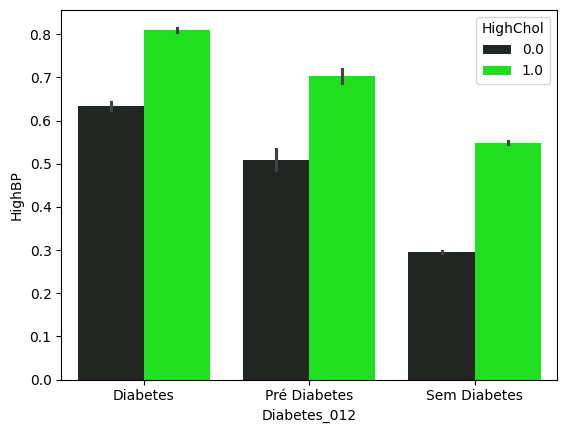

In [22]:
sns.barplot(data=df,x='Diabetes_012',y='HighBP',hue='HighChol',color='lime')

## Testes de Hipóteses

### Hipótese 1

Acreditamos que será possível prever se um paciente possui diabetes baseado nos campos com correlação positiva.

In [23]:
# Cria e armazena a matriz de correlação
matrix_corr = df_original.corr()
# Separa apenas as com correlação positiva
matrix_corr_diabetes_positivas = matrix_corr['Diabetes_012'][matrix_corr['Diabetes_012'] > 0]
# Apresenta as colunas
print('Colunas com correlações positivas:')
print('-'*30)
for each in list(matrix_corr_diabetes_positivas.keys()):
    print(each)

Colunas com correlações positivas:
------------------------------
Diabetes_012
HighBP
HighChol
CholCheck
BMI
Smoker
Stroke
HeartDiseaseorAttack
AnyHealthcare
NoDocbcCost
GenHlth
MentHlth
PhysHlth
DiffWalk
Sex
Age


Mapa de calor das correlações

<Axes: >

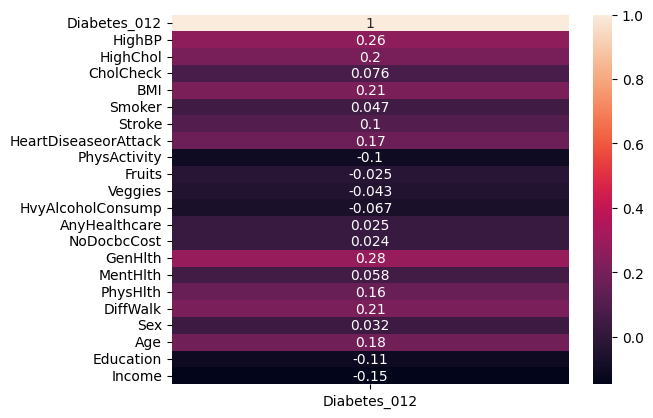

In [24]:
sns.heatmap(matrix_corr[['Diabetes_012']],annot=True)

Previsao Diabetes

In [25]:
# Cria e armazena uma copia do dataframe
df_copia = df_original.copy()
# Separa os dados Y (coluna que será feita a previsão)
Y = df_copia.Diabetes_012
# Remove esta coluna
del df_copia['Diabetes_012']

# Separa apenas colunas com correlação positiva
df_copia = df_copia[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']]

# Separa os dados X normalizados (colunas para prever Y)
X = pd.DataFrame(MinMaxScaler().fit_transform(df_copia),columns=df_copia.columns)

# Separação de dados de treino(70%) e teste(30%)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [26]:
# Cria e armazena um modelo de regressão logística
model = LogisticRegression(max_iter=5000,random_state=101)
# Treina o modelo
model.fit(x_train,y_train)
# Armazena a acurácia do modelo
score = model.score(x_test,y_test)
print(f'O Modelo de regressão logística apresentou uma acurácia de: {round(score*100,2)}%')

O Modelo de regressão logística apresentou uma acurácia de: 83.22%


### Hipótese 2

Temos por hipótese que hábitos de vida saudável influenciam diretamente a classificação pessoal de qualidade de vida.

In [27]:
print('Matrix de correlçao do campo GenHlth (classificação pessoal de qualidade de vida): ')
print('-'*30)
matrix_corr['GenHlth']

Matrix de correlçao do campo GenHlth (classificação pessoal de qualidade de vida): 
------------------------------


Diabetes_012            0.284881
HighBP                  0.272562
HighChol                0.187929
CholCheck               0.062782
BMI                     0.208411
Smoker                  0.134979
Stroke                  0.169870
HeartDiseaseorAttack    0.246411
PhysActivity           -0.237676
Fruits                 -0.071433
Veggies                -0.094345
HvyAlcoholConsump      -0.055598
AnyHealthcare          -0.023384
NoDocbcCost             0.149785
GenHlth                 1.000000
MentHlth                0.283949
PhysHlth                0.516508
DiffWalk                0.446735
Sex                    -0.010594
Age                     0.145430
Education              -0.244963
Income                 -0.331935
Name: GenHlth, dtype: float64

In [28]:
# Separa os dados Y (coluna que será feita a previsão)
Y = df_original.GenHlth

# Separa apenas colunas com correlação positiva
df_copia = df_original[['PhysActivity', 'Fruits','Veggies','HvyAlcoholConsump']]

# Separa os dados X normalizados (colunas para prever Y)
X = pd.DataFrame(MinMaxScaler().fit_transform(df_copia),columns=df_copia.columns)

# Separação de dados de treino(70%) e teste(30%)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [29]:
# Cria e armazena um modelo de regressão logística
model = LogisticRegression(max_iter=5000,random_state=101)
# Treina o modelo
model.fit(x_train,y_train)
# Armazena a acurácia do modelo
score = model.score(x_test,y_test)
print(f'O Modelo de regressão logística apresentou uma acurácia de: {round(score*100,2)}%')

O Modelo de regressão logística apresentou uma acurácia de: 36.05%
